# Data Visualization on Exchange Rates

The project goals are analyzing and visualizing the exchange rates of USD and EUR. The daily exchange rates were collected in between years 1999 and 2021. The original dataset was published by [Daria Chemkaeva](https://www.kaggle.com/lsind18) on Kaggle under the name [Daily Exchange Rates per Euro 1999-2021](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

## Exploring Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

In [2]:
#Rename the columns easier to analyze 
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},       inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time')

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013


In [3]:
#Extract just dataframe we need
euro_to_dollar=exchange_rates[["Time","US_dollar"]]
print(euro_to_dollar['US_dollar'].value_counts())

#Delete rows having '-'
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
#Convert rates to float
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.3148     1
1.0976     1
1.5833     1
1.2642     1
1.1818     1
Name: US_dollar, Length: 3549, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5719 non-null   datetime64[ns]
 1   US_dollar  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


The data is cleaned and prepared for visualization. The dataframe has two columns with **Time** and **US_dollar**  columns, 5719 rows with no null value.

## Exploratory visualizations
### Rolling Mean

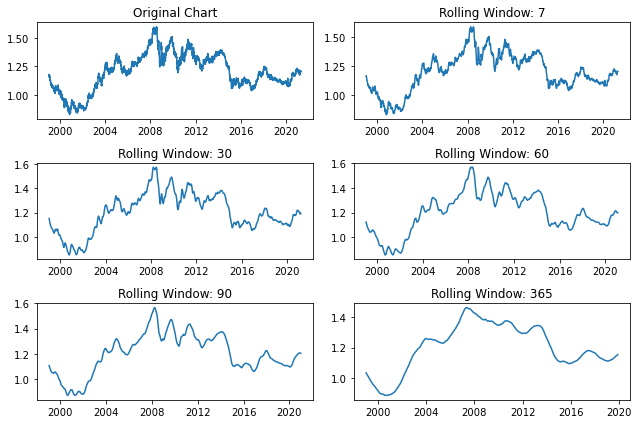

In [4]:
plt.figure(figsize=(9,6))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar["Time"],euro_to_dollar["US_dollar"])
plt.title("Original Chart")

for i, rolling_mean in zip([2,3, 4, 5, 6],
                           [7,30,60,90,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar["Time"],
             euro_to_dollar["US_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window: {}".format(rolling_mean))
    
plt.tight_layout()    
plt.show()

In [5]:
# We choose rolling 30 days, it not much detail and not much general
euro_to_dollar=euro_to_dollar.sort_values('Time').reset_index()
euro_to_dollar["rolling_mean"]=euro_to_dollar["US_dollar"].rolling(30).mean()
euro_to_dollar

,index,Time,US_dollar,rolling_mean
0,5780,1999-01-04,1.1789,NaN
1,5779,1999-01-05,1.1790,NaN
2,5778,1999-01-06,1.1743,NaN
3,5777,1999-01-07,1.1632,NaN
4,5776,1999-01-08,1.1659,NaN
...,...,...,...,...
5714,4,2021-04-30,1.2082,1.192843
5715,3,2021-05-03,1.2044,1.193283
5716,2,2021-05-04,1.2021,1.193717
5717,1,2021-05-05,1.2005,1.193980


## Explanatory visualizations: split rates under the last US presidents
**The goal** of the following visualization is to show how the EUR and USD exchange reates changed over the time period 2001-2021 under administration of Bush, Obama and Trump.

In [6]:
# DataFrame containing entries from 2001 to 2021
Presidents = (euro_to_dollar.copy()
              [(euro_to_dollar["Time"].dt.year >= 2001) &
              (euro_to_dollar["Time"].dt.year < 2021)]
             )
# DataFrame for Bush administration
Bush = Presidents.copy()[Presidents["Time"].dt.year < 2009]

# DataFrame for Obama administration
Obama = (Presidents.copy()
         [(Presidents["Time"].dt.year >= 2009) &
         (Presidents["Time"].dt.year < 2017)]
        )

# DataFrame for Trump administration
Trump = Presidents.copy()[Presidents["Time"].dt.year >= 2017]
         
Trump

,index,Time,US_dollar,rolling_mean
4610,1108,2017-01-02,1.0465,1.055517
4611,1107,2017-01-03,1.0385,1.054697
4612,1106,2017-01-04,1.0437,1.054097
4613,1105,2017-01-05,1.0501,1.053760
4614,1104,2017-01-06,1.0589,1.053897
...,...,...,...,...
5627,91,2020-12-24,1.2193,1.204173
5628,90,2020-12-28,1.2219,1.205520
5629,89,2020-12-29,1.2259,1.206950
5630,88,2020-12-30,1.2281,1.208280


<ipython-input-7-c5c835a14cb6>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2021',


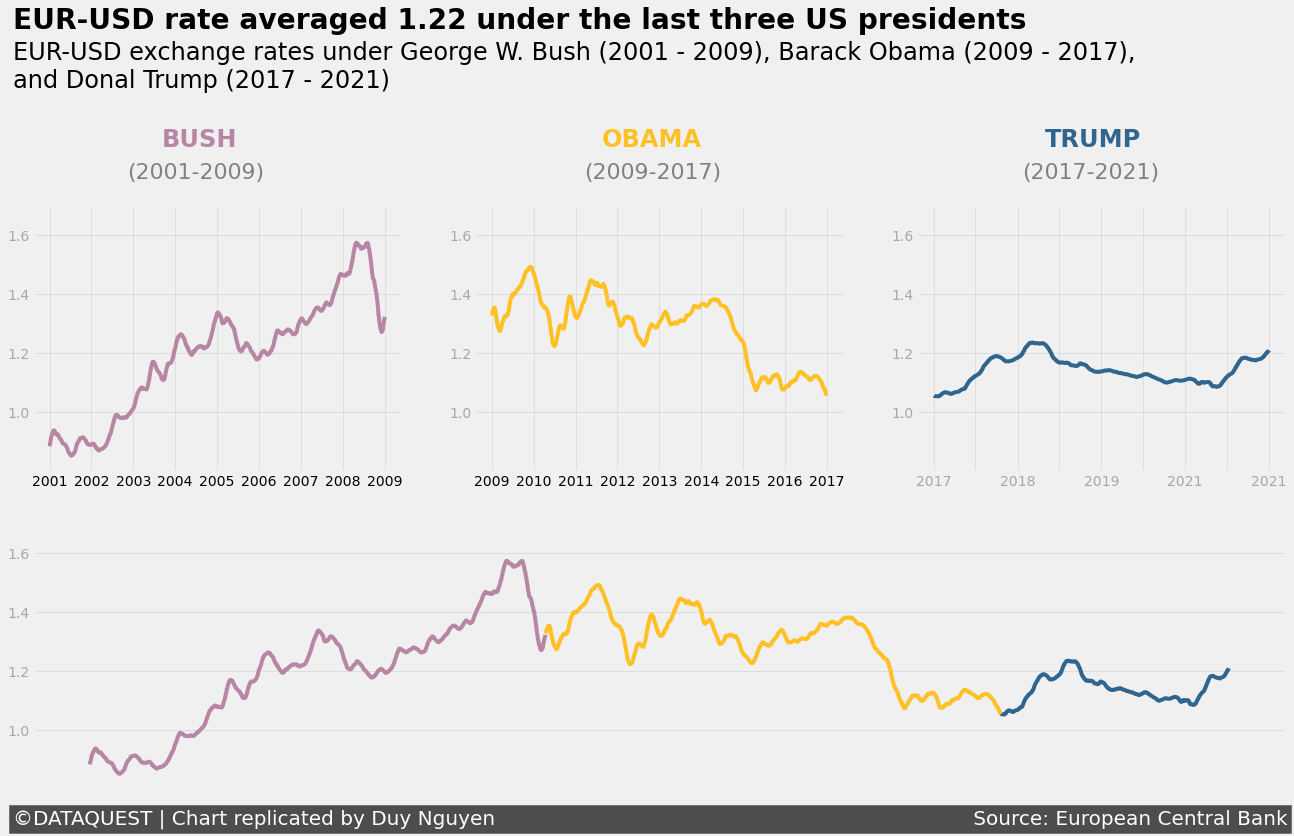

In [7]:
# Using the Five Thirty Eight style for the charts
import matplotlib.style as style
import numpy as np
style.use('fivethirtyeight')

# Adding the subplots
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

# Style for all subplots
for ax in axes:    
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)  
    
# Plotting Bush chart
ax1.plot(Bush["Time"],Bush["rolling_mean"], color="#B786A4")
ax1.text(12300, 1.9, "BUSH", color="#B786A4", weight="bold",
        size=24)
ax1.text(12000, 1.79, "(2001-2009)", color="gray", size=22)

# Plotting Obama chart
ax2.plot(Obama["Time"],Obama["rolling_mean"], color="#FFC125")
ax2.text(15200, 1.9, "OBAMA", color="#FFC125", weight="bold",
         size=24)
ax2.text(15050, 1.79, "(2009-2017)", color="gray", size=22)

# Plotting Trump chart
ax3.plot(Trump["Time"],Trump["rolling_mean"],color="#2F658E")
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2021',
                     '', '2021'],alpha=0.3)
ax3.text(17650, 1.9, "TRUMP", color="#2F658E", weight="bold",
         size=24)
ax3.text(17550, 1.79, "(2017-2021)", color="gray", size=22)

# Plotting summary chart for all presidents
ax4.plot(Bush["Time"],Bush["rolling_mean"], color="#B786A4")
ax4.plot(Obama["Time"],Obama["rolling_mean"], color="#FFC125")
ax4.plot(Trump["Time"],Trump["rolling_mean"], color="#2F658E")
ax4.set_xticks([])


# Adding title and subtitle
ax1.text(11000, 2.3, "EUR-USD rate averaged 1.22 under the last three US presidents",
         color="black", weight="bold",
        size=28)
ax1.text(11000, 2.1, '''EUR-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017),
and Donal Trump (2017 - 2021)''',
         color="black", size=24)
# Adding source bar
ax1.text(11000, -0.4, "©DATAQUEST | Chart replicated by Duy Nguyen" + " "*75 + "Source: European Central Bank",
         color="white", size=20, backgroundcolor = '#4d4d4d')
plt.show()

 ## How EUR-USD exchange rates changes after Brexit
How does EUR-USD exchange rates change after Brexit?

In [8]:
euro_to_dollar_from_2017 = (euro_to_dollar.copy()
              [(euro_to_dollar["Time"].dt.year >= 2017) &
              (euro_to_dollar["Time"].dt.year < 2022)]
             )


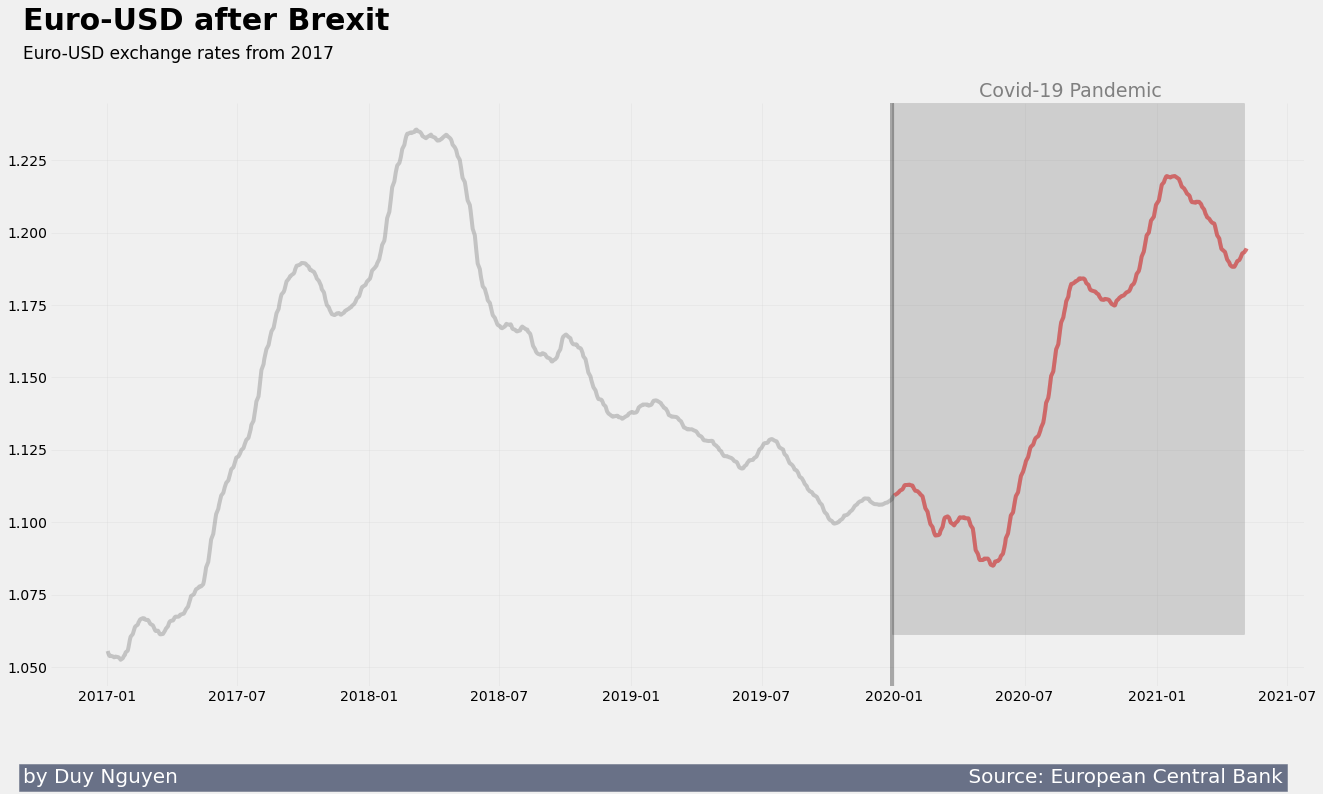

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(euro_to_dollar_from_2017['Time'],euro_to_dollar_from_2017['rolling_mean'],color='grey',alpha=0.4)
ax.text(17050,1.27,"Euro-USD after Brexit",size=30 , weight='bold')
ax.text(17050,1.26,"Euro-USD exchange rates from 2017",size=17)
ax.axvline(18259,color='black',alpha=0.3)
ax.tick_params(bottom=False,left=False)
ax.grid(alpha=0.2) 
for position in ['left','right','top','bottom']:
    ax.spines[position].set_visible(False)
    
euro_to_dollar_after_covid = (euro_to_dollar_from_2017.copy()[euro_to_dollar_from_2017["Time"].dt.year > 2019])
ax.plot(euro_to_dollar_after_covid['Time'],euro_to_dollar_after_covid['rolling_mean']
        ,color='red',alpha=0.4)
ax.axvspan(xmin=18259, xmax=18750, ymin=0.09,
           alpha=0.3, color='grey')
ax.text(18380,1.247,"Covid-19 Pandemic",color="gray", size=19)#We all know, rate is influenced by many factors
                                                             #Most of them is Covid-19 pandemic in this period
ax.text(17050, 1.01, "by Duy Nguyen" + " "*124 + "Source: European Central Bank",
         color="white", size=20, backgroundcolor = '#697187')
plt.show()  